In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [45]:
x_train = pd.read_csv(r"C:\Users\payal\OneDrive\Desktop\DL COdes\5 Fashion MNIST\fashion-mnist_train.csv\fashion-mnist_train.csv")
x_test =  pd.read_csv(r"C:\Users\payal\OneDrive\Desktop\DL COdes\5 Fashion MNIST\fashion-mnist_train.csv\fashion-mnist_train.csv" )


In [46]:
x_train.shape

(60000, 785)

In [47]:
y_train = x_train['label'].values
x_train = x_train.drop(columns=['label']).values

In [53]:
y_test = x_test['label'].values
x_test = x_test.drop(columns=['label']).values
                              

In [55]:
x_train = x_train/255.0
x_test = x_test/255.0

In [57]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [59]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [65]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

C:\Users\payal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
history = model.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.6558 - loss: 0.9489 - val_accuracy: 0.8208 - val_loss: 0.5006
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8291 - loss: 0.4754 - val_accuracy: 0.8446 - val_loss: 0.4311
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8530 - loss: 0.4041 - val_accuracy: 0.8618 - val_loss: 0.3876
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8644 - loss: 0.3693 - val_accuracy: 0.8693 - val_loss: 0.3658
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8776 - loss: 0.3305 - val_accuracy: 0.8702 - val_loss: 0.3579


In [73]:
test_loss , test_acc = model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8850 - loss: 0.3162
0.32314684987068176
0.8817833065986633


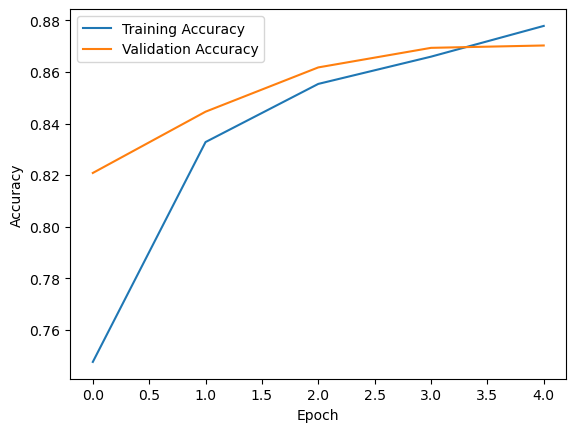

In [95]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [79]:
predictions = model.predict(x_test)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(9,15))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(x_test[i])
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[np.argmax(y_test[i])]
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}")
    plt.axis('off')

plt.show()